# 2022-1 제 1회 인사이콘 : HR Analytics - How to reduce Employee Turnover?

## Dataset
1. **WA_Fn-UseC_-HR-Employee-Attrition.csv**
- HR 데이터가 담겨있는 데이터셋입니다. **해당 파일의 데이터를 이용해서 EDA 및 Feature Engineering을 진행합니다.**
2. **WA_Fn-UseC_-HR-Employee-Attrition.xlsx**
- sheet 1: HR 데이터의 가독성을 위해 정리된 시트입니다. csv 파일과 동일한 내용입니다.
- sheet 2(Variable Dictionary): 각 변수들에 대한 설명이 담겨있습니다.

## General Guideline:

주어진 HR 데이터를 통해 **종업원 퇴사의 주된 원인을 탐색 및 시각화하여, 경영진에게 인사이트 및 문제에 대한 해결방안을 도출하는** case 입니다.

권장하는 진행 순서는 다음과 같습니다.

1. **EDA + Feature Engineering**
- 데이터에 대한 EDA 및 Feature Engineering을 진행하여 활용할 Feature들을 확정합니다. 
2. **Interpretation**
- Employee Turnover에 영향을 미치는 변인과 그 관계를 탐색 및 해석합니다.
3. **Insight**
- 분석 결과를 바탕으로 인사이트를 도출하여, 경영진에게 Employee Turnover 제고 전략을 제시합니다.
4. **presentation**
- 주피터 노트북 or 노션 페이지로 자료를 정리 및 발표합니다.

# EDA + Feature Processing

EDA 및 Feature Processing을 진행하고, 활용할 Feature들을 확정합니다.

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# 활용할 최종 Feature 확정
data.info()

In [2]:
col=["Attrition",'Gender','BusinessTravel','Department','JobInvolvement','JobLevel',
     'JobRole','OverTime','PerformanceRating']


In [3]:
for i in col:
    print(data[i].value_counts())
    print()

No     1233
Yes     237
Name: Attrition, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

No     1054
Yes     416
Name: OverTime, dtype: int64

3    1244
4     226
Name: PerformanceRating, dtype: int64



# Feature 분석/시각화

## Department

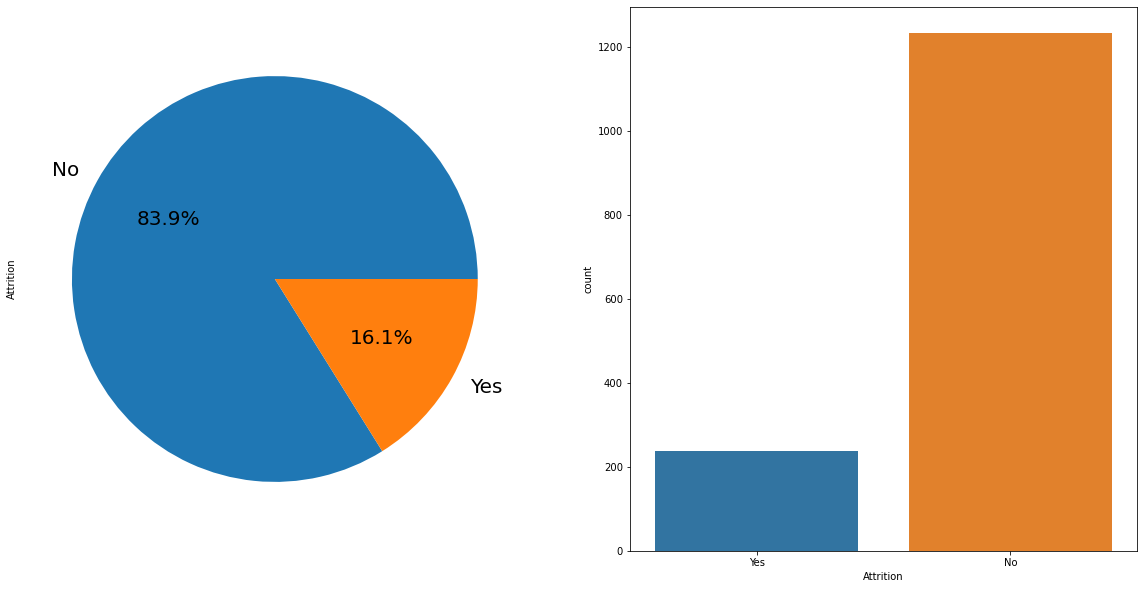

In [8]:

f, ax= plt.subplots(1,2,figsize=(20,10))

data['Attrition'].value_counts().plot.pie(autopct='%1.1f%%',
                                         ax=ax[0],
                                         fontsize=20)

sns.countplot("Attrition", data=data, ax=ax[1])
plt.show()



In [9]:
data["Attrition"].replace('Yes',1,inplace=True)
data["Attrition"].replace('No',0,inplace=True)
data['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

0: 미퇴직자. 1: 퇴직자

회사원 중 퇴사자 비율은 16.1%로 237명<br> 재직 비율은 83.9%로 1233명이다.

In [11]:
data.groupby(['Department','Attrition'])['Attrition'].count()

Department              Attrition
Human Resources         0             51
                        1             12
Research & Development  0            828
                        1            133
Sales                   0            354
                        1             92
Name: Attrition, dtype: int64

In [12]:
data.groupby(['Department','Gender'])['Gender'].count()

Department              Gender
Human Resources         Female     20
                        Male       43
Research & Development  Female    379
                        Male      582
Sales                   Female    189
                        Male      257
Name: Gender, dtype: int64

In [13]:
data.groupby(['Gender','Attrition'])['Attrition'].count()

Gender  Attrition
Female  0            501
        1             87
Male    0            732
        1            150
Name: Attrition, dtype: int64

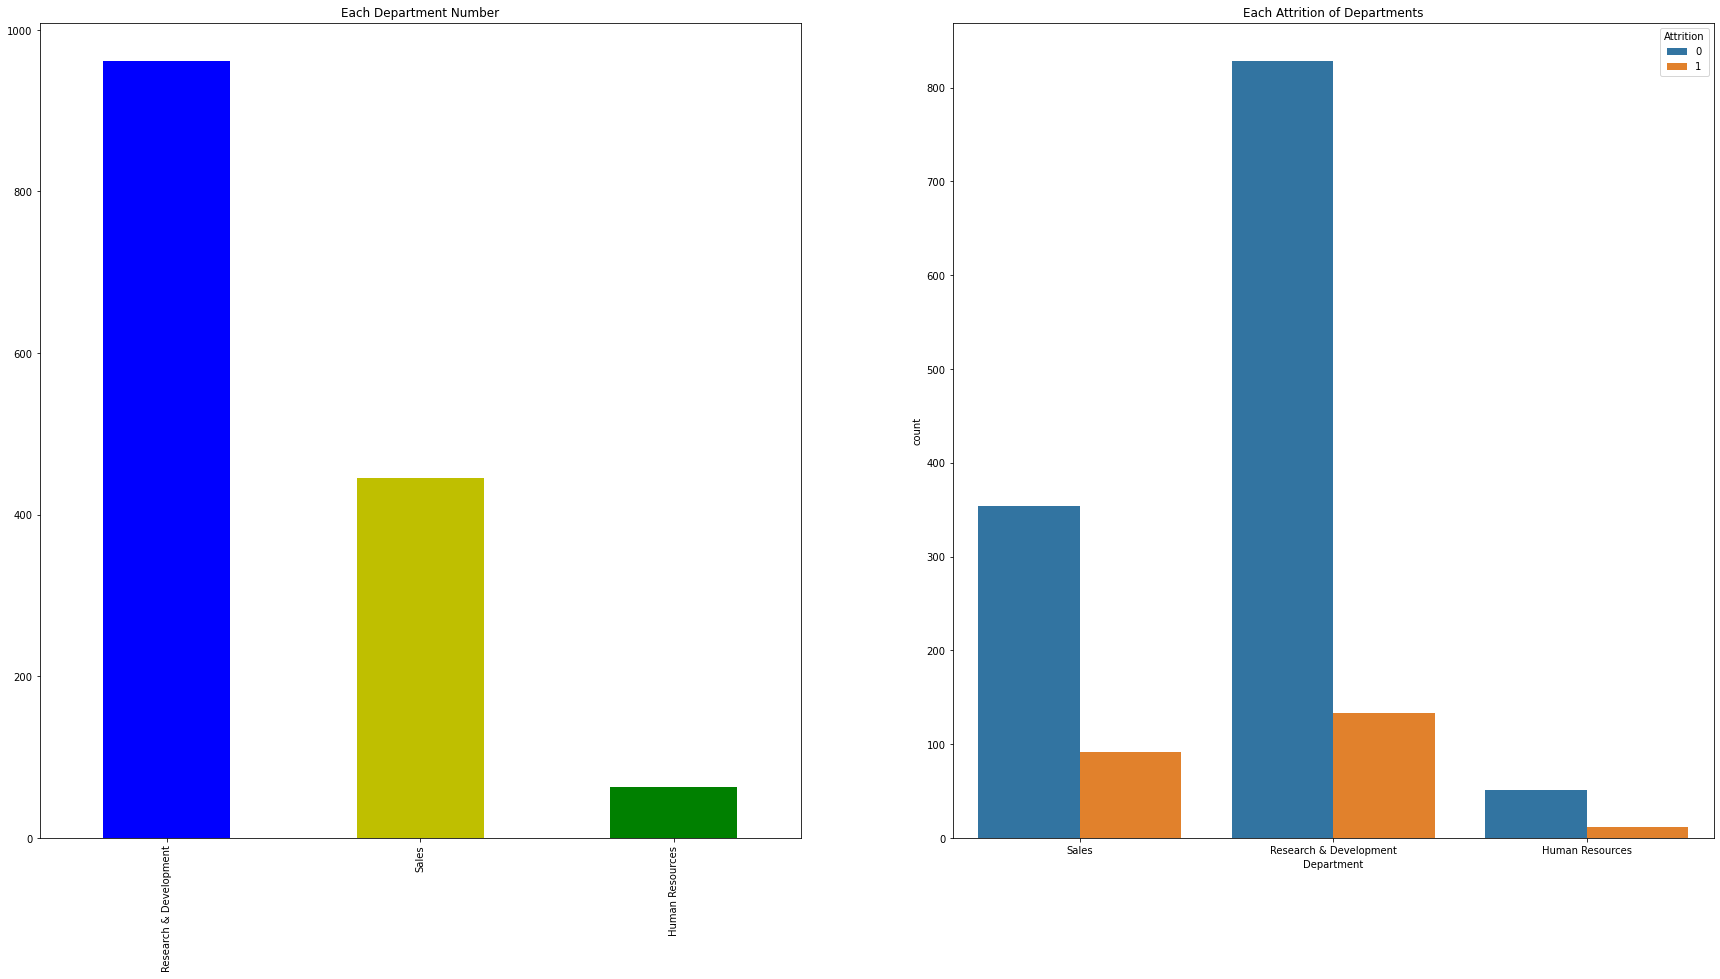

In [14]:
f, ax = plt.subplots(1,2, figsize=(30,15))


data["Department"].value_counts().plot.bar(ax=ax[0],
                                          color=['b','y','g'])
ax[0].set_title("Each Department Number")

sns.countplot('Department', hue="Attrition", data=data, ax=ax[1])
ax[1].set_title("Each Attrition of Departments")
plt.show()

 HumanResources = 20%<br>
 Research & Development= 13.83%<br>
 Sales = 20%<br>
 <br>
 Research & Development는 평균 퇴직 비율에 비해 3% 작고
 HumanResources와 Sales 부서는 평균 퇴직 비율에 비해 4% 높게 나타난다.

## BusinessTravel

In [15]:
data["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [16]:
data.groupby(['BusinessTravel','Attrition'])['Attrition'].count()

BusinessTravel     Attrition
Non-Travel         0            138
                   1             12
Travel_Frequently  0            208
                   1             69
Travel_Rarely      0            887
                   1            156
Name: Attrition, dtype: int64

In [29]:
data.groupby(['BusinessTravel','Department'])['Department'].count()

BusinessTravel     Department            
Non-Travel         Human Resources             6
                   Research & Development     97
                   Sales                      47
Travel_Frequently  Human Resources            11
                   Research & Development    182
                   Sales                      84
Travel_Rarely      Human Resources            46
                   Research & Development    682
                   Sales                     315
Name: Department, dtype: int64

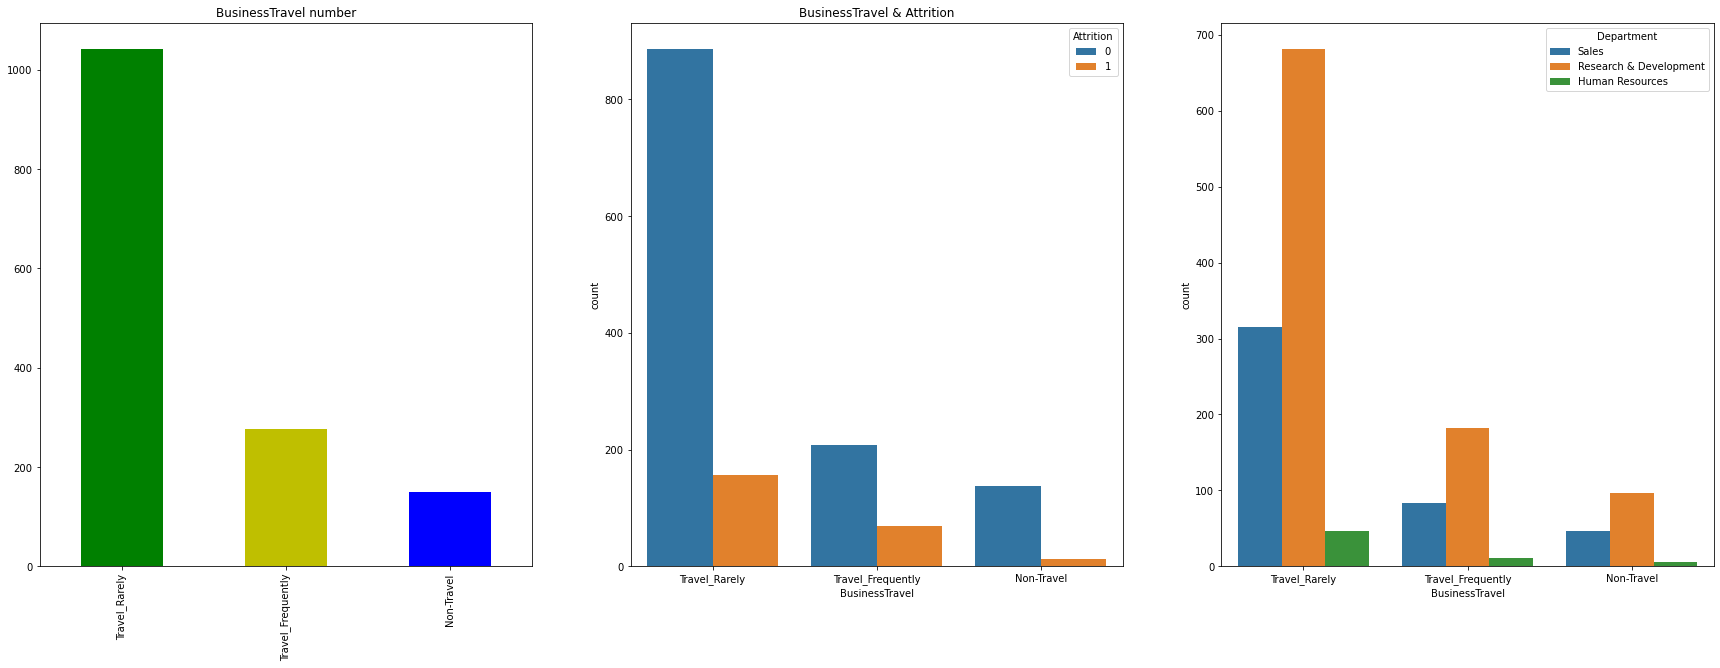

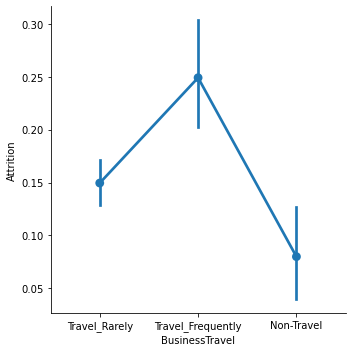

In [28]:
f, ax = plt.subplots(1,3,figsize=(30,10))

data['BusinessTravel'].value_counts().plot.bar(ax=ax[0], color=['g','y','b'])
ax[0].set_title("BusinessTravel number")

sns.countplot('BusinessTravel',hue='Attrition', data=data, ax=ax[1])
ax[1].set_title("BusinessTravel & Attrition")

sns.countplot('BusinessTravel',hue='Department', data=data, ax=ax[2])
ax[2].set_title("BusinessTravel & Department")

sns.factorplot('BusinessTravel', 'Attrition', data=data) ## sex별로 pclass의 변화에 따른 survived 변화
plt.show()

출장이 빈번한 이들의 퇴사 비율이 25%로 가장 낮았으며, 출장이 전혀 없는 직장이 약 10%미만의 비율을 보이고 있다. 

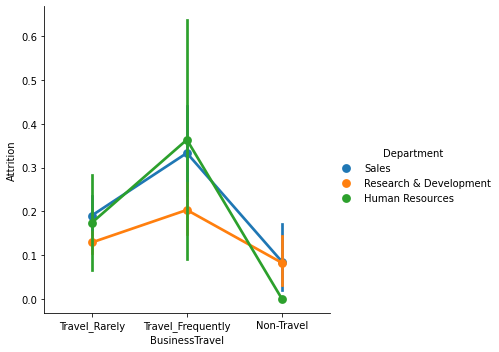

In [26]:
# 업무별로 출장회수에 따른 퇴직자의 비율 
sns.factorplot('BusinessTravel', 'Attrition', hue='Department', data=data)
plt.show()

모든 업무에서 동일하게 나타나고 있다. 

## JobInvolvement

In [30]:
data['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

Text(0.5, 1.0, 'JobInvolvement & BusinessTravel')

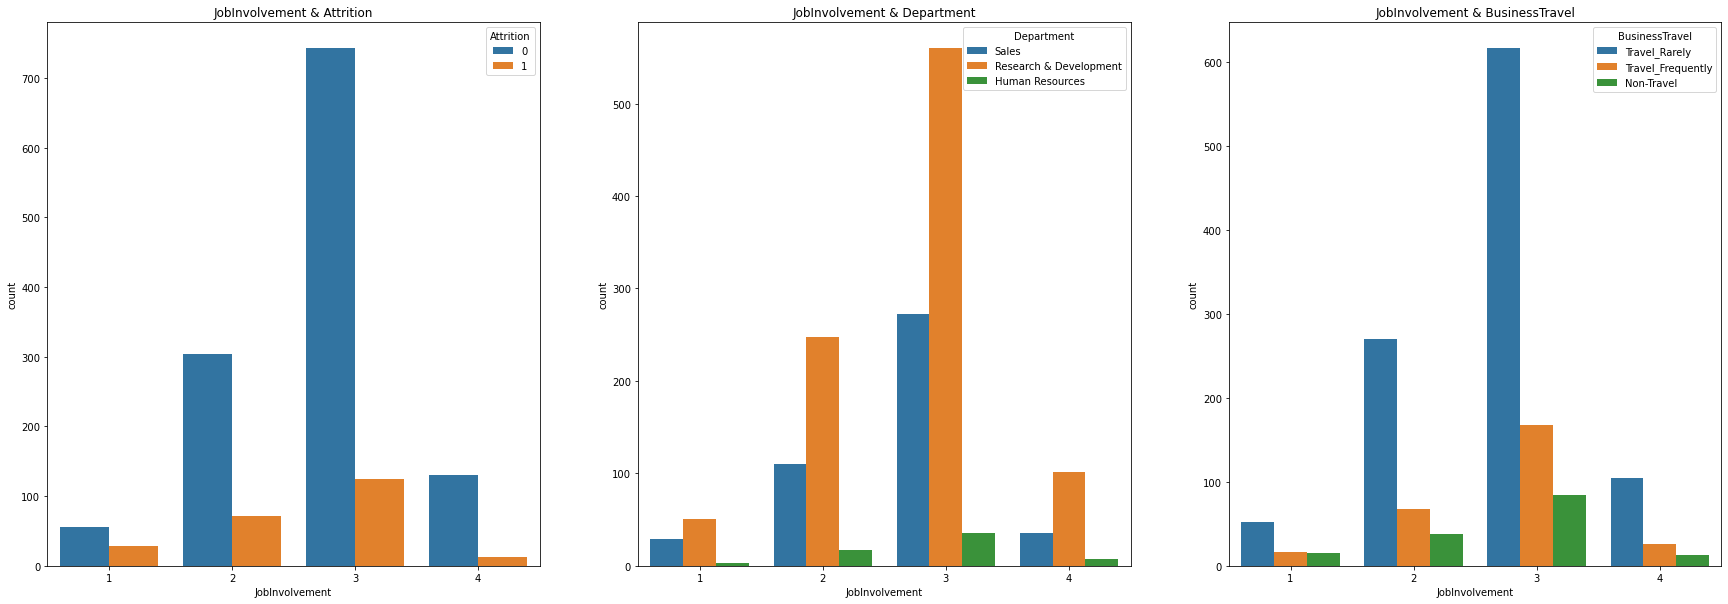

In [40]:
f, ax = plt.subplots(1,3,figsize=(30,10))

sns.countplot('JobInvolvement', hue="Attrition", data=data,ax=ax[0])
ax[0].set_title('JobInvolvement & Attrition')

sns.countplot('JobInvolvement', hue="Department", data=data,ax=ax[1])
ax[1].set_title('JobInvolvement & Department') 

sns.countplot('JobInvolvement', hue="BusinessTravel", data=data,ax=ax[2])
ax[2].set_title('JobInvolvement & BusinessTravel') # 비율이 일정.

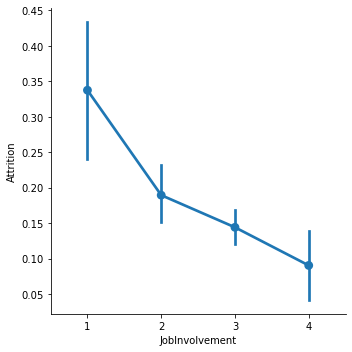

In [41]:
sns.factorplot('JobInvolvement', 'Attrition', data=data)
plt.show()

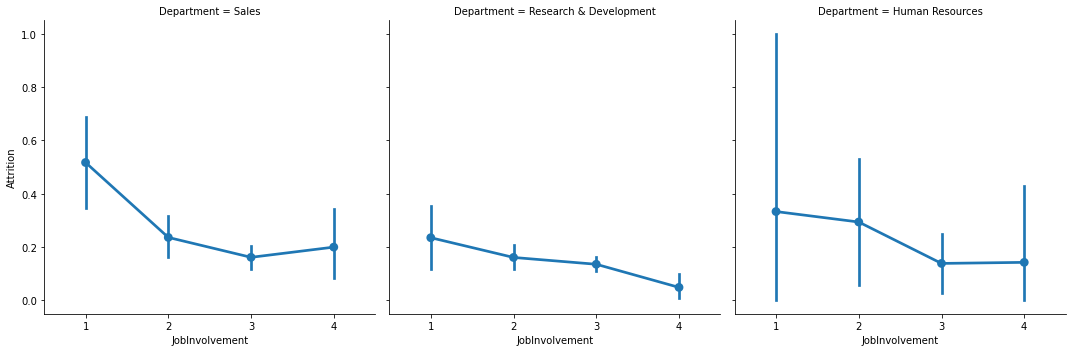

In [44]:
sns.factorplot('JobInvolvement', 'Attrition',col="Department", data=data)
plt.show() 

sales부분에서 차이가 심하게 나타남. 평균적으로 직업적 연관성이 적을수록 평균 최사 비율 16%보다 높게 나타난다.

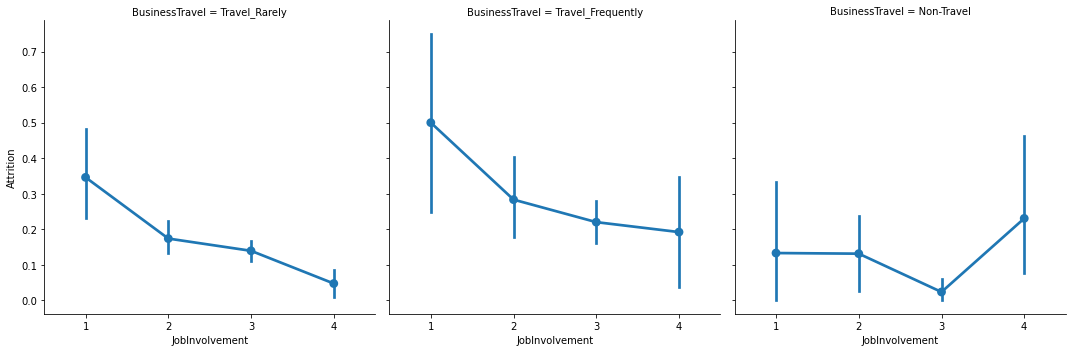

In [45]:
sns.factorplot('JobInvolvement', 'Attrition',col="BusinessTravel", data=data)
plt.show() 

출장이 드문 경우, 직업 연관성이 적을수록 퇴사자 비율이 높다<br>
출장이 빈번한 경우, 직업 연관성이 적을수록 퇴사자 비율이 높다.<br>
출장이 없는 경우에는 유의미한 차이가 없다. <br>
직업연관성이 적고 출장빈도가 높으면 높을수록 퇴사 비율이 증가함을 알 수 있다. 